# Counterparty credit risk

We want to quantify CCR to find out how costly it is to buy a financial contract from a risky counterparty

## Definition of a problem
Today ($t_0=0$) we buy from a counterparty a call (or put) option with maturity ($T=$)1 year and strike ($K=$)100.

- The option is written on an underlying stock $S$ with value $S(0)=85$.
- the stock $S$ pays a dividend $d=2\%$ per year and has a volatility of $\sigma=25\%$ per year
- the interest rate on the market is $r=5\%$ per year

In [1]:
T = 1 #maturity
K = 100 #strike
S0 = 85 #initial stock
d = .02 #dividend
sigma = .25 #volatility
r = .05 #interest rate
days = 365 #days in a year

## Stock simulation

We assume that the stock $S(t)$ evolves as a geometric brownian motion:
$$ S(t+\Delta t) = S(t)\cdot\exp\left[\left(r-d-\sigma^2/2\right)\Delta t + \sigma\sqrt{\Delta t}\cdot Z\right]$$ 
where $Z$ is a standard normally distributed random variable

In [2]:
import pandas as pd
import numpy as np

from IPython.display import clear_output
from numpy.random import randn

In [3]:
N = 10000 #number of paths

dt = T/days
paths = pd.DataFrame()

for k in range(N):
    #initialize new path
    S = S0
    path = [S]
    
    #simulate path
    for l in range(T*days):
        Z = randn()
        S = S*np.exp((r-d-(sigma**2)/2)*dt+sigma*np.sqrt(dt)*Z)
        path.append(S)
        
    #add the path to the dataframe
    paths["path"+str(k)] = path
    print("Path",k+1,"simulated")
    clear_output(wait=True)

print("Done")

Done


In [4]:
paths.head()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
0,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
1,85.915629,85.349137,85.192780,85.077217,83.980932,84.909903,84.588974,85.815391,85.257630,85.116607,...,86.311476,84.007226,86.528310,83.759947,84.564506,85.041746,84.882647,85.845828,84.236557,85.200157
2,86.075882,83.436203,85.626547,84.310673,85.848155,86.126082,85.894867,86.419451,83.740612,86.031482,...,86.095024,83.704546,87.651611,83.675427,84.179918,84.006549,85.277328,85.235736,81.965874,84.481723
3,85.826634,82.615588,86.351106,83.645970,86.218750,85.296593,85.499380,85.788654,83.473550,85.655875,...,85.230639,82.996017,86.795722,82.571251,85.387019,83.571659,83.530670,87.007717,81.605130,83.454729
4,85.587053,82.889701,87.647067,83.126592,85.685483,85.396121,85.639250,85.727522,84.996103,86.727517,...,85.375391,83.463098,87.672910,83.166879,84.634265,81.780064,84.107929,85.873389,80.357631,83.926636


In [5]:
paths.tail()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
361,50.875398,90.426217,84.813924,114.346523,100.103637,97.355975,72.883150,87.391856,60.593130,91.716921,...,122.513948,85.521743,105.138992,58.512453,57.252798,83.876823,104.616973,84.013348,66.056743,96.169847
362,51.341105,91.998234,85.403418,114.336736,99.548889,96.530271,73.565530,89.296134,60.936138,92.204272,...,122.265012,85.135010,106.010522,57.861601,57.202468,85.752638,102.776466,83.571580,64.966985,95.668106
363,52.293605,94.061947,85.369006,115.670621,101.172888,98.705746,73.330394,89.276574,61.156004,93.038534,...,120.727123,83.985285,105.388758,58.054584,56.762933,87.680405,100.711301,84.605287,65.580407,93.610687
364,51.966333,93.324183,86.529681,114.471184,102.391112,98.065200,73.047094,89.272431,60.300268,93.922125,...,119.569596,82.288061,103.761638,57.088336,56.442967,89.397717,100.504255,86.219785,65.523887,94.057667
365,51.312195,91.856664,87.687478,113.827631,102.658422,97.542599,73.814870,90.087187,59.997564,95.003868,...,120.199247,81.472250,104.097656,56.817587,55.931217,89.225316,102.008307,87.496522,64.355342,93.976524


### Plotting some paths

In [6]:
import matplotlib.pyplot as plt

In [7]:
#find paths with extremal values at ends
Min = 1000
Min_path = ''
Max = 0
Max_path =''
Mean_path = ''
Mean_dist = 1000
for path in paths.keys():
    if path=='t':
        continue
    val = paths.loc[T*days,path]
    if val>Max:
        Max = val
        Max_path = path
    if val<Min:
        Min = val
        Min_path = path
    if abs(val-S0)<Mean_dist:
        Mean_path = path

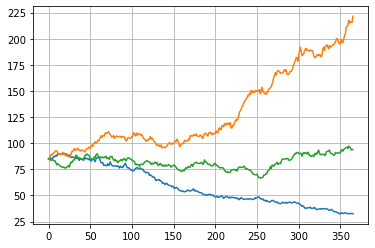

In [8]:
#plot extremal paths
Min_plot = paths[Min_path]
plt.plot(Min_plot)
Max_plot = paths[Max_path]
plt.plot(Max_plot)
Mean_plot = paths[Mean_path]
plt.plot(Mean_plot)
plt.grid(True)

plt.show()

## Pricing under scenario with Black-Scholes formula

A **call option** is a financial contract where the buyer has the right - but not the obligation - to buy the stock $S$ on a future date $T$ at a contractually fixed price $K$. The date $T$ is called *maturity*, while the fixed price is called *strike*.

If $S(T)>K$ then we *exercise* the option: we buy the ctock for price $K$, while on the market its value is $S(T)$, hence we gain $S(T)-K$.

If $S(T)\leq K$ then we do not exercise the option: we can buy the stock on the market for a price which is lower than the strike $K$, hence the value of the option is 0.

Hence, the price of the call option at maturity is $V(T) = \max(S(T)-K,0)$.

A **put option** is a financial contract where the buyer has the right - but not the obligation - to sell the stock $S$ on a future date $T$ at a contractually fixed price $K$. The date $T$ is called *maturity*, while the fixed price is called *strike*.

If $S(T)<K$ then we *exercise* the option: we sell the ctock for price $K$, while on the market its value is $S(T)$, hence we gain $K-S(T)$.

If $S(T)\geq K$ then we do not exercise the option: we can buy the stock on the market for a price which is lower than the strike $K$, hence the value of the option is 0.

Hence, the price of the call option at maturity is $V(T) = \max(K-S(T),0)$.

### Black-Scholes formulas
If we assume that $S(t)$ evolves as a geometric brownian motion then the price of a call and put option with maturity $T$ and strike $K$ are given by the Black-Scholes formulas:

$$ Call(t) = e^{-d(T-t)}\cdot S(t)\cdot N(d_1)-e^{-r(T-t)}\cdot K\cdot N(d_2) $$

$$ Put(t) = -e^{-d(T-t)}\cdot S(t)\cdot N(d_1)-e^{-r(T-t)}\cdot K\cdot N(d_2) $$

where $N$ is the cummulative function of a standard normal distribution and $d_1$, $d_2$ are given by

$$ d_1 = \frac{\ln\left(\frac{S(t)}{K}\right)+\left(r-d+\sigma^2/2\right)(T-t)}{\sigma\sqrt{T-t}}$$

$$ d_2 = d_1 - \sigma\sqrt{T-t}.$$

Setting $\omega=1$ for a call option and $\omega=-1$ for a put option, formulas above condense to

$$ V(t,\omega) = \omega\left[e^{-d(T-t)}\cdot S(t)\cdot N(\omega d_1)-e^{-r(T-t)}\cdot K\cdot N(\omega d_2)\right].$$

In [9]:
from scipy.stats import norm

In [10]:
w = 1 #call or put

Values = pd.DataFrame()

t = np.linspace(0,T,T*days+1)
for path, S in paths.iteritems():
    a = np.log(S/K) + (r-d+(sigma**2)/2)*(T-t)
    b = sigma*np.sqrt(T-t)
    d1 = a/b
    d2 = d1 - sigma*np.sqrt(T-t)
    V = w*(np.exp(-d*(T-t))*S*norm.cdf(w*d1)-np.exp(-r*(T-t))*K*norm.cdf(w*d2))
    Values[path] = V
    print("Path",path[4:],"values calculated")
    clear_output(wait=True)   
    
print("Done")

Done


In [11]:
Values.head()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
0,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,...,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206
1,4.484263,4.288112,4.234935,4.195898,3.836830,4.139782,4.033473,4.449157,4.256940,4.209178,...,4.624577,3.845205,4.702573,3.766905,4.025440,4.183962,4.130686,4.459799,3.918740,4.237434
2,4.528024,3.654355,4.370947,3.930719,4.447985,4.545787,4.464330,4.650456,3.749101,4.512349,...,4.534792,3.737794,5.106182,3.728681,3.888577,3.833146,4.251248,4.237130,3.218457,3.986284
3,4.427838,3.395429,4.613097,3.707787,4.565900,4.245389,4.314626,4.414606,3.654282,4.368537,...,4.223022,3.508693,4.773839,3.382385,4.276176,3.684666,3.671952,4.851677,3.106208,3.648472
4,4.332238,3.465443,5.077739,3.536661,4.366204,4.266825,4.350229,4.380761,4.131794,4.735956,...,4.259760,3.639440,5.087555,3.548866,4.011997,3.144238,3.841702,4.431505,2.761957,3.784129


In [12]:
Values.tail()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
361,2.508642e-148,3.683146e-05,6.158859e-11,14.376243,1.113849,0.210457,1.326790e-34,6.219268e-08,7.493523e-83,3.296712e-04,...,22.541878,4.760404e-10,5.198337,2.135161e-94,5.613675e-102,3.440425e-12,4.693492,5.305320e-12,1.258465e-57,7.873080e-02
362,1.357529e-191,6.409388e-05,5.267779e-13,14.359030,0.704681,0.058535,6.997415e-43,1.245988e-07,3.557563e-107,9.603804e-05,...,22.286002,1.910964e-13,6.037753,4.473781e-130,1.895888e-135,1.907634e-12,2.924536,3.340507e-16,5.764117e-82,2.189022e-02
363,1.909071e-270,2.291689e-04,1.319459e-18,15.685339,1.483664,0.264841,2.522428e-64,1.268260e-10,4.883776e-157,2.062802e-05,...,20.741287,3.892572e-22,5.405844,2.685507e-191,3.603073e-207,1.516820e-13,1.160740,1.659976e-20,1.931647e-116,8.267466e-05
364,0.000000e+00,1.504091e-08,1.183528e-29,14.478610,2.417533,0.039132,7.353424e-129,3.122068e-19,0.000000e+00,2.094726e-07,...,19.576742,1.482160e-51,3.770572,0.000000e+00,0.000000e+00,8.053837e-19,0.818957,5.241444e-31,1.121030e-230,3.681044e-07
365,0.000000e+00,0.000000e+00,0.000000e+00,13.827631,2.658422,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,20.199247,0.000000e+00,4.097656,0.000000e+00,0.000000e+00,0.000000e+00,2.008307,0.000000e+00,0.000000e+00,0.000000e+00


### Plotting some values

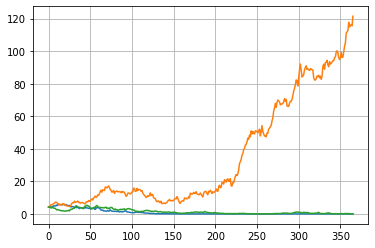

In [13]:
Min_values = Values[Min_path]
Max_values = Values[Max_path]
Mean_values = Values[Mean_path]

plt.plot(Min_values)
plt.plot(Max_values)
plt.plot(Mean_values)
plt.grid(True)
plt.show()

## Aggregation of exposures and their mitigation
The **positive exposure** is defined as
$$ PE = \max(V,0) $$
If $V<0$ then we do not have exposure to the counterparty and hence we do not have counterparty risk

The **expected positive exposure** is defined as an average of positive exposures. The exposure profile tells us how much we would lose on an average on a time step $t$ if the counterparty decided not to fulfill its contractual obligations.

In [38]:
PEs = pd.DataFrame({path:(V+abs(V))/2 for path, V in Values.iteritems()})
EPEs = [np.mean(row) for t,row in PEs.iterrows()]

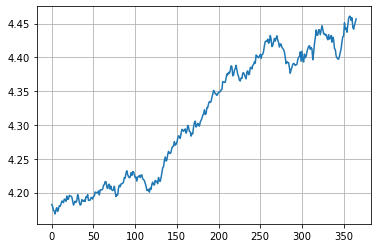

In [39]:
plt.plot(EPEs)
plt.grid(True)
plt.show()

## Collateral

If the expected exposure is too high, we can sign with the counterparty a *collateral* agreement.
In a collateral agreement, we specify the maximum amount of exposure that we are willing to
accept. Such amount is called **threshold**.

If the exposure exceeds the threshold $Th$, the counterparty is obliged to give us (post) a
certain amount of cash – called *collateral* – so that the exposure reduces to an amount no
bigger than the threshold.
Hence, the amount of collateral - $Coll$ that the counterparty has to post on a time step $t$ and is given by:

$$Coll(t) = \max(V(t)-Th,0).$$

If $V(t) > Th$, the exposure is higher than the threshold, hence the counterparty has to post
$V(t) − Th$ to reduce the exposure down to the threshold.
If $V(t) \leq Th$, the exposure is below the threshold, hence the counterparty does not have to
post collateral.

### The collaterized exposure
If the counterparty posts collateral, the exposure to the counterparty is reduced by the amount of collateral we receive. This new exposure is called *collateralized*.

It is defined as
$$CollPE = \max(V-Coll,0).$$

Note that this quantity is always smaller than the threshold $Th$.

Then we define the *collateralized expected positive exposure$ as an arithmetic average of collateralized positive exposures.

In [40]:
Th = 4.5 #threshold
CollPEs = pd.DataFrame()

for path, V in Values.iteritems():
    U = V-Th
    coll = (U+abs(U))/2
    U = V-coll
    CollPE = (U+abs(U))/2
    CollPEs[path] = CollPE
    
CollEPEs = [np.mean(row) for t, row in CollPEs.iterrows()]    

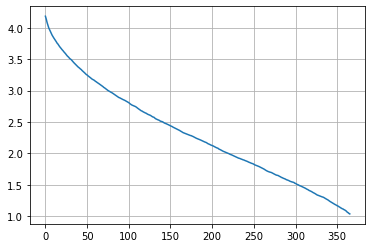

In [41]:
plt.plot(CollEPEs)
plt.grid(True)
plt.show()

## Credit Valuation Adjustment


Let us think what is the *price* of a counterparty risk:
 - if the counterparty defaults in a time interval $(t_{j-1},t_j]$, the loss we are going to suffer is approximately $CollEPE(t_j)$
 - calling $DP(t_{j-1},t_j)$ the probability that the counterparty is going to default in $(t_{j-1},t_j]$, the probable loss is
 $$ DP\cdot CollEPE$$
 - calling $DF(t_0,t_j)$ the discount factor between $t_0$ and $t_j$, today's value of the probable loss is
 $$ DF\cdot DP\cdot CollEPE$$
 - when the counterparty defaults, we may be able to recover part of the loss. What we cannot recover is called *Loss Given Default* (LGD) which is a number between 0\% (no loss) and 100\% (total loss). Today's value of what we can lose including LGD is
 $$ LGD\cdot DF\cdot DP\cdot CollEPE$$

 - the default may happen in any of the time intervals, hence the above quantity needs to be computed for each time interval
 
 - the sum of the above values is the price of counterparty risk at $t_0$ which is called **Credit Valuation Adjustment** (CVA)
 $$ CVA(t_0) = LGD\cdot\sum_{j=1}^M DF(t_0,t_j)\cdot DP(t_{j-1},t_j)\cdot CollEPE(t_j)$$
 
 We need to compute discount factors $DF(t_0,t_j)$. Given the interest rate $r$, the discount factor is given by
 $$ DF(t_0,t_j) = \exp(-r\cdot(t_j-t_0)).$$
 
 We need to compute the default probability $DP(t_{j-1},t_j)$. Given a hazard rate $h$, the survival probability $SP$ between $t_0$ and $t_j$ is given by
 $$ SP(t_0,t_j) = \exp(-h\cdot(t_j-t_0)),$$
 hence the default probability between $t_{j-1}$ and $t_j$ is given by
 $$ DP(t_{j-1},t_j) = \exp(-h(t_{j-1}-t_0)) - \exp(-h(t_j-t_0)).$$

In [29]:
h = .01 #hazard rate
LGD = .5
t = np.linspace(0,T,T*days+1)
times = [t[j:] for j in range(T*days+1)]

restrCollEPEs = [CollEPEs[j:] for j in range(T*days+1)]

In [27]:
#calculating discount factors
DF = [np.exp(-r*time) for time in times]

In [23]:
#survival probabilities
SP = [np.exp(-h*time) for time in times]

In [28]:
#default probabilities
DP = [np.exp(-h*time)-np.exp(-h*(time+dt)) for time in times]

In [32]:
CVA = [LGD*sum(DF[j]*DP[j]*restrCollEPEs[j]) for j in range(T*days+1)]

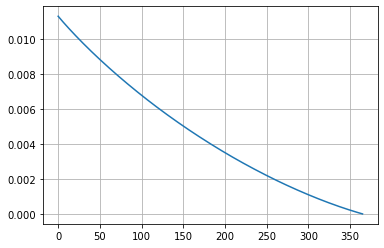

In [33]:
plt.plot(CVA)
plt.grid(True)
plt.show()